In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import torch
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('/content/train_data_QUICK_START.csv')

In [ ]:
#trainFull = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/train_data.csv') - full training data set, may not be using it

In [ ]:
test = pd.read_csv('/content/test_sequences.csv')

In [ ]:
train.info()
#list(train.columns) - lists out all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335616 entries, 0 to 335615
Columns: 416 entries, sequence_id to reactivity_error_0206
dtypes: float64(412), object(4)
memory usage: 1.0+ GB


In [ ]:
#list(trainFUll.columns)

In [ ]:
train['sequence'].describe()
#335,616 total sequences
#half of those are unique, because 167,808 of them are unique but they are tested against 2 chemical modifiers

count                                                335616
unique                                               167808
top       GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...
freq                                                      2
Name: sequence, dtype: object

In [ ]:
train['sequence'].str.len()

0         177
1         177
2         177
3         177
4         177
         ... 
335611    177
335612    177
335613    177
335614    177
335615    177
Name: sequence, Length: 335616, dtype: int64

In [ ]:
print(test.columns) # all columns in test sequences
test['sequence'].describe()

Index(['id_min', 'id_max', 'sequence_id', 'sequence', 'future'], dtype='object')


count                                               1343823
unique                                              1343823
top       GGGAACGACUCGAGUAGAGUCGAAAAUUUCCUUCCAAAUCCUGAGG...
freq                                                      1
Name: sequence, dtype: object

In [ ]:
newTrain = train #created newTrain = training_quick_start dataset, but will be adding sequence length column to it (didnt want to modify original train dataset )
newTrain['sequenceLength'] = train['sequence'].str.len()
print(newTrain['sequenceLength'].describe())
print(newTrain['sequenceLength'].unique())
newTrain
#newTrain.index
#some reactivities and reactivity errors dont exist for certain sequences (meaning they dont react or there's no information because they arent that length

count    335616.000000
mean        175.652037
std           8.854856
min         115.000000
25%         177.000000
50%         177.000000
75%         177.000000
max         206.000000
Name: sequenceLength, dtype: float64
[177 206 115 170 155]


,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206,sequenceLength
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335611,fffee332db3a,GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGAAGUAGAACUACC...,DMS_MaP,DasLabBigLib_OneMil_RNAmake_designs_delete_lon...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
335612,ffff7786573c,GGGAACGACUCGAGUAGAGUCGAAAAGAAGACGUGACGAAAAGUCA...,2A3_MaP,OpenKnot1_Twist_2A3_EternaPlayers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
335613,ffff7786573c,GGGAACGACUCGAGUAGAGUCGAAAAGAAGACGUGACGAAAAGUCA...,DMS_MaP,OpenKnot1_Twist_DMS_EternaPlayers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
335614,ffffa291ee37,GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGAAUGCGAAGAACC...,2A3_MaP,DasLabBigLib_OneMil_RNAmake_designs_delete_lon...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177


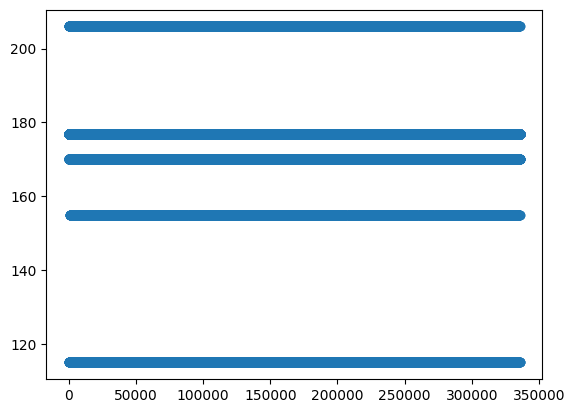

In [ ]:
plt.scatter(newTrain.index,newTrain['sequenceLength']) #attempt at scatter plot. shows that all sequences are 115,155,170,177, or 206 in length

(array([  5154.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   3652.,      0.,      0.,      0.,  27254., 294788.,
             0.,      0.,      0.,      0.,      0.,   4768.]),
 array([115.  , 119.55, 124.1 , 128.65, 133.2 , 137.75, 142.3 , 146.85,
        151.4 , 155.95, 160.5 , 165.05, 169.6 , 174.15, 178.7 , 183.25,
        187.8 , 192.35, 196.9 , 201.45, 206.  ]),
 <BarContainer object of 20 artists>)

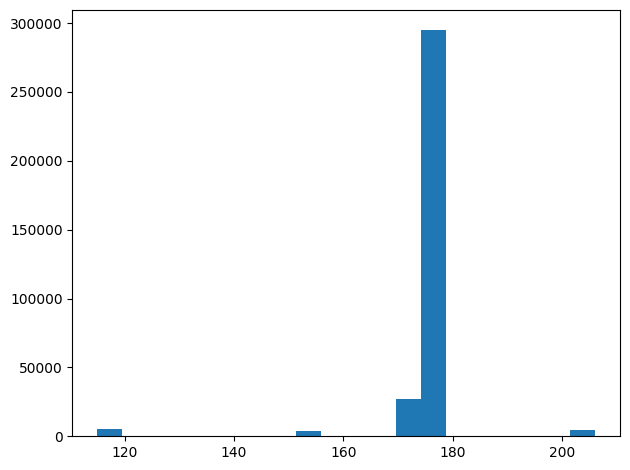

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(newTrain['sequenceLength'], bins = 20) #histogram of distribution of sequence lengths, most of the RNA sequences are 177
axs.set_xaxis

In [ ]:
#list(newTrain[newTrain['reactivity_0030'] == 0].count())
#newTrain['reactivity_0030'] == 0.count()
#newTrain['reactivity_0030'].isin(0.0).any()
newTrain.iloc[:,4:210] == -400.0

,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,reactivity_0010,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335614,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#newTrain.loc[newTrain.reactivity_0030 == 0.0]
newTrain['reactivity_0030'].value_counts()[0.0].sum()
newTrain['reactivity_0030'].value_counts()[0.0] # trying to see if 0 is an actual number used in the reactivity values. it is, so replacing NaN with 0 could cause problems

22859

In [ ]:
newTrain.loc[newTrain['reactivity_0030'] == 0.0] #identifying rows where reactivity_0030 = 0

,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206,sequenceLength
5,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,DMS_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
7,00026ef17e1b,GGGAACGACUCGAGUAGAGUCGAAAAGGAGAUCGAAGACGACUUAC...,DMS_MaP,OpenKnot1_Twist_DMS_EternaPlayers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
37,0008d4d2ccf7,GGGAACGACUCGAGUAGAGUCGAAAAAUGUCACUGACUUCAAUGCG...,DMS_MaP,DasLabBigLib_OneMil_Coronavirus_genomes_SARS_r...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
65,000e7086e1f1,GGGAACGACUCGAGUAGAGUCGAAAACGUGAUCUUUCAGGUAUGUC...,DMS_MaP,OpenKnot1_Twist_DMS_EternaPlayers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
139,001ca3573d6d,GGGAACGACUCGAGUAGAGUCGAAAAGGGGGAGUUCAGACACUGUA...,DMS_MaP,OpenKnot1_Twist_DMS_EternaPlayers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335573,fff78d0d4fff,GGGAACGACUCGAGUAGAGUCGAAAACAGGAGAAUUAUACUAGCAU...,DMS_MaP,DasLabBigLib_OneMil_Coronavirus_genomes_SARS_r...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
335578,fff93c0b5fca,GGGAACGACUCGAGUAGAGUCGAAAAUCCCCUUAUGUCCAGCCCCU...,2A3_MaP,15k_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
335579,fff93c0b5fca,GGGAACGACUCGAGUAGAGUCGAAAAUCCCCUUAUGUCCAGCCCCU...,DMS_MaP,15k_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
335602,fffe2b33fc63,GGGAACGACUCGAGUAGAGUCGAAAAUGUUAUGACAGGUUUAAAGU...,2A3_MaP,DasLabBigLib_OneMil_Coronavirus_genomes_SARS_r...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177


In [ ]:
newTrain['reactivity_0030'][5:20] # looking at the rows in column reactivity_0030, confirms that 0.000 is used

5     0.000
6    -0.062
7     0.000
8     0.490
9     5.697
10   -0.017
11    0.269
12    0.082
13    0.180
14    0.136
15    0.754
16    0.013
17    0.004
18    0.486
19    1.337
Name: reactivity_0030, dtype: float64

In [ ]:
#figured out how to handle null values - set to a large negative or positive value that is not in the set at that point? or could maybe set it to a different data type?

In [ ]:
#newTrain.iloc[:,4:210].describe()
newTrain.iloc[:,4:210].info() #information of columns 4 - 210: reactivity_0001 to 0206

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335616 entries, 0 to 335615
Columns: 206 entries, reactivity_0001 to reactivity_0206
dtypes: float64(206)
memory usage: 527.5 MB


In [ ]:
np.nanmin(newTrain.iloc[:,4:210]) # minimal value that is not NaN

-25.674

In [ ]:
#newTrain.first_valid_index()

In [ ]:
fillTrain = newTrain #created fillTrain because didn't want to modify newTrain or train datasets/frames incase something went wrong
fillTrain.isna().sum() # confirmation of how many NaN values exist in each column

sequence_id                   0
sequence                      0
experiment_type               0
dataset_name                  0
reactivity_0001          335616
                          ...  
reactivity_error_0203    335616
reactivity_error_0204    335616
reactivity_error_0205    335616
reactivity_error_0206    335616
sequenceLength                0
Length: 417, dtype: int64

In [ ]:
fillTrain = fillTrain.fillna(-1000.0) #maybe consider replacing all NaN values with a string/character instead of a number?
print(fillTrain.isna().sum())
fillTrain

sequence_id              0
sequence                 0
experiment_type          0
dataset_name             0
reactivity_0001          0
                        ..
reactivity_error_0203    0
reactivity_error_0204    0
reactivity_error_0205    0
reactivity_error_0206    0
sequenceLength           0
Length: 417, dtype: int64


,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206,sequenceLength
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335611,fffee332db3a,GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGAAGUAGAACUACC...,DMS_MaP,DasLabBigLib_OneMil_RNAmake_designs_delete_lon...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
335612,ffff7786573c,GGGAACGACUCGAGUAGAGUCGAAAAGAAGACGUGACGAAAAGUCA...,2A3_MaP,OpenKnot1_Twist_2A3_EternaPlayers,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
335613,ffff7786573c,GGGAACGACUCGAGUAGAGUCGAAAAGAAGACGUGACGAAAAGUCA...,DMS_MaP,OpenKnot1_Twist_DMS_EternaPlayers,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
335614,ffffa291ee37,GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGAAUGCGAAGAACC...,2A3_MaP,DasLabBigLib_OneMil_RNAmake_designs_delete_lon...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,177
